In [31]:
from selenium import webdriver
from bs4 import BeautifulSoup
import time
url = 'https://news.naver.com/main/read.nhn?mode=LSD&mid=shm&sid1=102&oid=421&aid=0004496996'

#웹 드라이버
driver = webdriver.Chrome('C:\selenium/chromedriver.exe')
driver.implicitly_wait(30)
driver.get(url)

result = 0;

In [32]:
#더보기 클릭
while True:
    try:
        더보기 = driver.find_element_by_css_selector('a.u_cbox_btn_more')
        더보기.click()
        time.sleep(0.1)
        result = result+1
        if result == 100:
            break
    except:
        break

In [33]:
html = driver.page_source
soup = BeautifulSoup(html,'html.parser')

In [34]:
items = soup.select('span.u_cbox_contents')

In [35]:
items[0].text

'박근혜 시계는  입막음용 협박인가? 왜 보란듯이 떡 까놓고 있었을까?'

In [36]:
results = []
for item in items:
    comment = item.text.replace('\n',' ')
    data = [comment]
    results.append(data)

In [37]:
import pandas as pd

In [38]:
results_df = pd.DataFrame(results)
results_df

,0
0,박근혜 시계는 입막음용 협박인가? 왜 보란듯이 떡 까놓고 있었을까?
1,두번이나 절한건 니네들 다 골로 보낸다는의미는 아니겠죠??원래 죽은사람에게 두번 절...
2,"쓸데없는 얘기, 말도 안되는 소리 마라 사람들이 죽었다! 절대 이 사태 못넘어간..."
3,확산을 막는데 노력했다고? 그럼 일반교회잠입해서 바이러스 퍼트리라는 지령은 뭔데??...
4,"영생불사한다는 놈이 마스크는 왜 쓰냐? 저 놈 뒤 봐주는 정치인, 검찰 싹 다 잡아..."
...,...
574,신천지는 전염병의 확산에 일조했다. 고의성은 없었지만 이만희가 큰절로 사과했다. 전...
575,박근혜팔이 또 하나? 저 신천지 돌아이 스키 물귀신 작전임? 문재인한테 받은 것도 ...
576,누가보면 신천지가 중국우한폐렴 만들줄 알겠네 ㅋㅋㅋ....정부의 무능함을 신천지로 ...
577,문재앙보다 낫네


In [39]:
results_df.columns = ['댓글']
results_df

,댓글
0,박근혜 시계는 입막음용 협박인가? 왜 보란듯이 떡 까놓고 있었을까?
1,두번이나 절한건 니네들 다 골로 보낸다는의미는 아니겠죠??원래 죽은사람에게 두번 절...
2,"쓸데없는 얘기, 말도 안되는 소리 마라 사람들이 죽었다! 절대 이 사태 못넘어간..."
3,확산을 막는데 노력했다고? 그럼 일반교회잠입해서 바이러스 퍼트리라는 지령은 뭔데??...
4,"영생불사한다는 놈이 마스크는 왜 쓰냐? 저 놈 뒤 봐주는 정치인, 검찰 싹 다 잡아..."
...,...
574,신천지는 전염병의 확산에 일조했다. 고의성은 없었지만 이만희가 큰절로 사과했다. 전...
575,박근혜팔이 또 하나? 저 신천지 돌아이 스키 물귀신 작전임? 문재인한테 받은 것도 ...
576,누가보면 신천지가 중국우한폐렴 만들줄 알겠네 ㅋㅋㅋ....정부의 무능함을 신천지로 ...
577,문재앙보다 낫네


In [40]:
results_df.to_csv("first_crawling_naver.csv", index=False)

In [41]:
pd.read_csv("first_crawling_naver.csv").head()

,댓글
0,박근혜 시계는 입막음용 협박인가? 왜 보란듯이 떡 까놓고 있었을까?
1,두번이나 절한건 니네들 다 골로 보낸다는의미는 아니겠죠??원래 죽은사람에게 두번 절...
2,"쓸데없는 얘기, 말도 안되는 소리 마라 사람들이 죽었다! 절대 이 사태 못넘어간..."
3,확산을 막는데 노력했다고? 그럼 일반교회잠입해서 바이러스 퍼트리라는 지령은 뭔데??...
4,"영생불사한다는 놈이 마스크는 왜 쓰냐? 저 놈 뒤 봐주는 정치인, 검찰 싹 다 잡아..."


In [42]:
from wordcloud import WordCloud, STOPWORDS

In [43]:
import matplotlib.pyplot as plt
from konlpy.tag import Komoran
komoran = Komoran()

In [44]:
komoran

In [45]:
%time komoran_content_nouns = komoran.nouns(''.join(str(results_df['댓글'].fillna(''))))
komoran_content_nouns

Wall time: 23.9 ms


['박근혜',
 '시계',
 '입',
 '협박',
 '보란',
 '듯이',
 '떡',
 '번',
 '절',
 '건',
 '골',
 '의미',
 '원래',
 '사람',
 '번',
 '절',
 '얘기',
 '말',
 '안',
 '소리',
 '마라',
 '사람',
 '절대',
 '사태',
 '확산',
 '노력',
 '일반',
 '교회',
 '잠입',
 '바이러스',
 '퍼트',
 '리라',
 '지령',
 '영생',
 '불사',
 '놈',
 '마스크',
 '놈',
 '뒤',
 '정치인',
 '검찰',
 '신천지',
 '전염병',
 '확산',
 '일조',
 '고의',
 '성은',
 '이만희',
 '큰절',
 '사과',
 '전',
 '박근혜',
 '팔',
 '신천지',
 '돌아이',
 '스키',
 '물귀신',
 '작전',
 '임',
 '문재인',
 '것',
 '누가',
 '신천지',
 '중국',
 '우',
 '한',
 '폐렴',
 '줄',
 '무능',
 '신천지',
 '문',
 '재앙',
 '댓글',
 '수준',
 '무식',
 '무식',
 '세',
 '할아버지',
 '댓글']

In [46]:
def komoran_nouns_wordcloud(content):
    komoran_content_nouns = komoran.nouns(''.join(str(results_df['댓글'].fillna(''))))
    displayWordCloud(' '.join(komoran_content_nouns))

In [47]:
from collections import Counter
count = Counter(komoran_content_nouns)
count

Counter({'박근혜': 2,
         '시계': 1,
         '입': 1,
         '협박': 1,
         '보란': 1,
         '듯이': 1,
         '떡': 1,
         '번': 2,
         '절': 2,
         '건': 1,
         '골': 1,
         '의미': 1,
         '원래': 1,
         '사람': 2,
         '얘기': 1,
         '말': 1,
         '안': 1,
         '소리': 1,
         '마라': 1,
         '절대': 1,
         '사태': 1,
         '확산': 2,
         '노력': 1,
         '일반': 1,
         '교회': 1,
         '잠입': 1,
         '바이러스': 1,
         '퍼트': 1,
         '리라': 1,
         '지령': 1,
         '영생': 1,
         '불사': 1,
         '놈': 2,
         '마스크': 1,
         '뒤': 1,
         '정치인': 1,
         '검찰': 1,
         '신천지': 4,
         '전염병': 1,
         '일조': 1,
         '고의': 1,
         '성은': 1,
         '이만희': 1,
         '큰절': 1,
         '사과': 1,
         '전': 1,
         '팔': 1,
         '돌아이': 1,
         '스키': 1,
         '물귀신': 1,
         '작전': 1,
         '임': 1,
         '문재인': 1,
         '것': 1,
         '누가': 1,
         '중국'

In [48]:
words = dict(count.most_common())
words

{'신천지': 4,
 '박근혜': 2,
 '번': 2,
 '절': 2,
 '사람': 2,
 '확산': 2,
 '놈': 2,
 '댓글': 2,
 '무식': 2,
 '시계': 1,
 '입': 1,
 '협박': 1,
 '보란': 1,
 '듯이': 1,
 '떡': 1,
 '건': 1,
 '골': 1,
 '의미': 1,
 '원래': 1,
 '얘기': 1,
 '말': 1,
 '안': 1,
 '소리': 1,
 '마라': 1,
 '절대': 1,
 '사태': 1,
 '노력': 1,
 '일반': 1,
 '교회': 1,
 '잠입': 1,
 '바이러스': 1,
 '퍼트': 1,
 '리라': 1,
 '지령': 1,
 '영생': 1,
 '불사': 1,
 '마스크': 1,
 '뒤': 1,
 '정치인': 1,
 '검찰': 1,
 '전염병': 1,
 '일조': 1,
 '고의': 1,
 '성은': 1,
 '이만희': 1,
 '큰절': 1,
 '사과': 1,
 '전': 1,
 '팔': 1,
 '돌아이': 1,
 '스키': 1,
 '물귀신': 1,
 '작전': 1,
 '임': 1,
 '문재인': 1,
 '것': 1,
 '누가': 1,
 '중국': 1,
 '우': 1,
 '한': 1,
 '폐렴': 1,
 '줄': 1,
 '무능': 1,
 '문': 1,
 '재앙': 1,
 '수준': 1,
 '세': 1,
 '할아버지': 1}

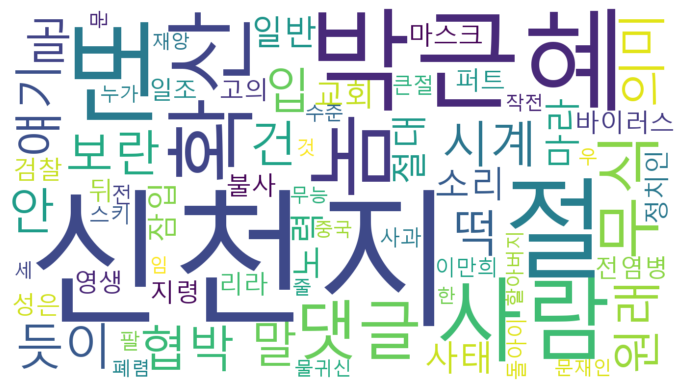

In [58]:
wordcloud2 = WordCloud(width=2100,
                       height=1100,
                       mask=elise_mask,
                       font_path='c:/Windows/Fonts/malgun.ttf',
                       background_color='white').generate_from_frequencies(words)
plt.figure(figsize=(12,12))
plt.imshow(wordcloud2,interpolation='bilinear')
plt.axis('off')
plt.margins(x=0,y=0)
plt.show()

In [52]:
import numpy as np
from PIL import Image
elise_mask = np.array(Image.open("data/elise.jpg"))


In [53]:
elise_mask

array([[[102, 102, 102],
        [102, 102, 102],
        [102, 102, 102],
        ...,
        [102, 102, 102],
        [102, 102, 102],
        [102, 102, 102]],

       [[102, 102, 102],
        [102, 102, 102],
        [102, 102, 102],
        ...,
        [102, 102, 102],
        [102, 102, 102],
        [102, 102, 102]],

       [[102, 102, 102],
        [102, 102, 102],
        [102, 102, 102],
        ...,
        [102, 102, 102],
        [102, 102, 102],
        [102, 102, 102]],

       ...,

       [[102, 102, 102],
        [102, 102, 102],
        [102, 102, 102],
        ...,
        [102, 102, 102],
        [102, 102, 102],
        [102, 102, 102]],

       [[102, 102, 102],
        [102, 102, 102],
        [102, 102, 102],
        ...,
        [102, 102, 102],
        [102, 102, 102],
        [102, 102, 102]],

       [[102, 102, 102],
        [102, 102, 102],
        [102, 102, 102],
        ...,
        [102, 102, 102],
        [102, 102, 102],
        [102, 102, 102]]

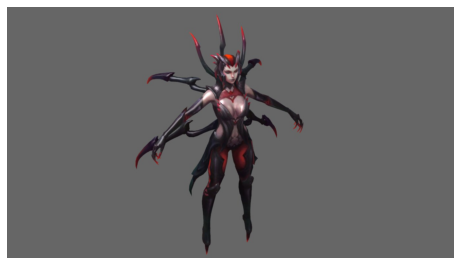

In [55]:
plt.figure(figsize = (8,8))
plt.imshow(elise_mask , cmap = plt.cm.gray , interpolation = 'bilinear')
plt.axis("off")
plt.show()

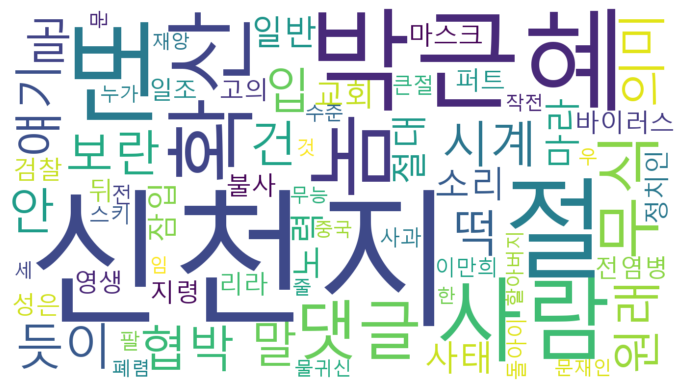

In [59]:
plt.figure(figsize = (12, 12))
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis('off')
plt.show()